In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/ElectricCarData_Clean_Me.csv')

In [4]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [5]:
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [6]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [7]:
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros'
t2 = 'More than 50,000 Euros'

Function for Data Visualization

Count Plots

count plot for body style

In [12]:
def bodystyle(dataframe):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Count', fontsize= 15)
    plt.show()

Bar Graphs

Function to plot of vehicals

In [13]:
def range(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'Range_Km' , data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Range(Km) of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

Range vs Battery Pack

In [14]:
def range_batterypack(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Battery_Pack Kwh'], label= 'Battery Pack', color = 'black')
  plt.title('''RANGE (Km) vs BATTERY PACK CAPACITY (KwH) of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Battery Pack Capacity (Kwh)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

Acceleration (0 - 100Km/Hr)

In [15]:
def acc(dataframe, text):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'AccelSec', data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Acceleration 0-100 Km  of EV's costing {}'''.format(text), fontsize= 20)
  plt.ylabel('Acceleration (seconds)')
  plt.xlabel('Model')
  plt.xticks(rotation = 90)
  plt.show()

Range vs Price

In [16]:
def range_price(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['PriceEuro'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs PRICE (Euros)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Price (Euros)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

Range vs Efficiency

In [17]:
def range_efficiency(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'darkseagreen')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'darkseagreen', size = 20)
  ax2.set_ylabel('Efficiency (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

Fast Charging data

In [18]:
def fastcharge(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'FastCharge_KmH' , data = dataframe, color = 'lightslategrey')
  plt.title('''Fast Charging of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Charging Capacity (kmH)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

**Data Visualiztion**


In [20]:
def power_train(dataframe):
    sns.countplot(x= dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)

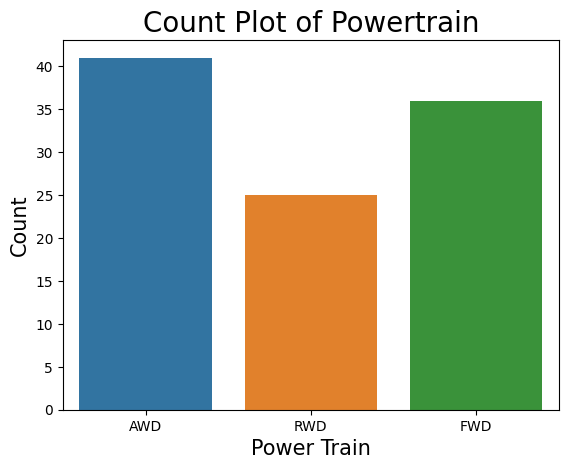

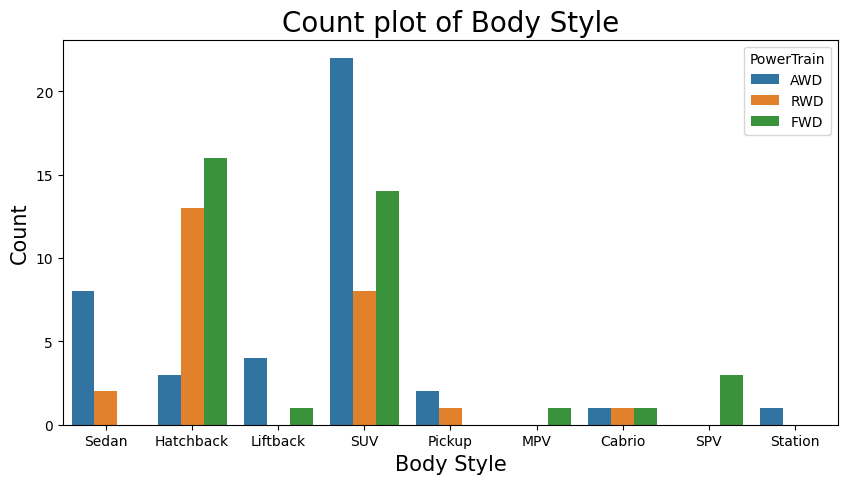

In [21]:
# Count Plots
power_train(df)
bodystyle(df)

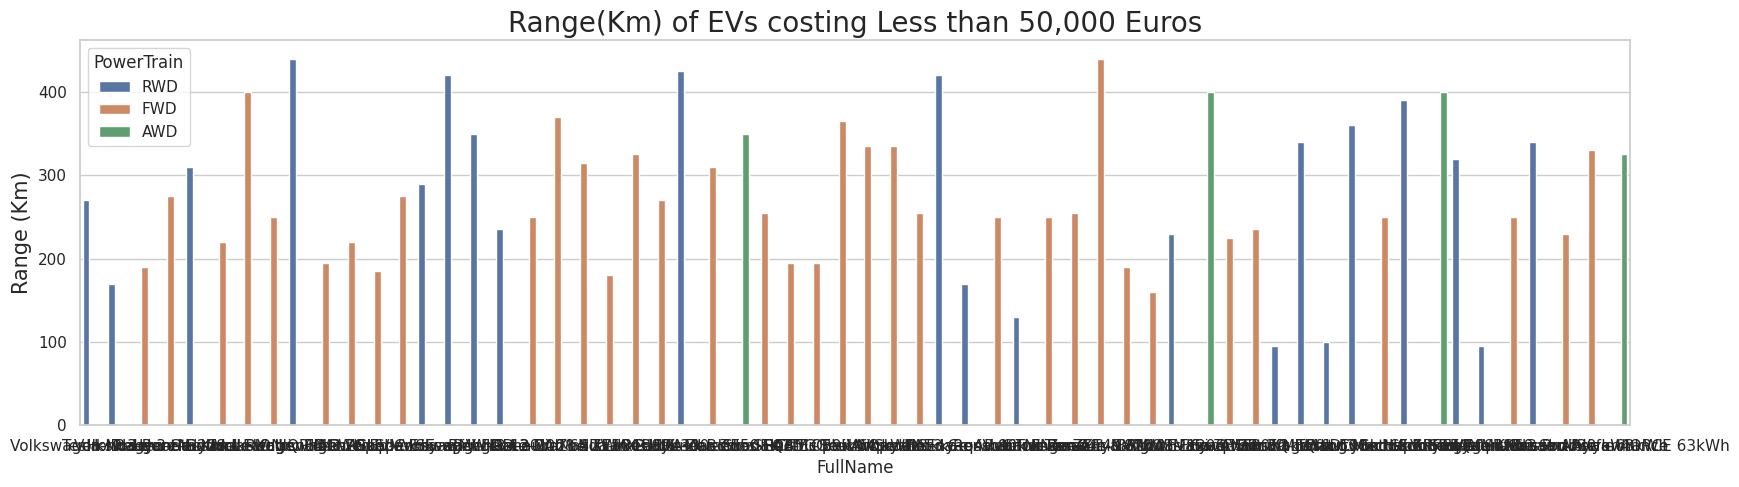

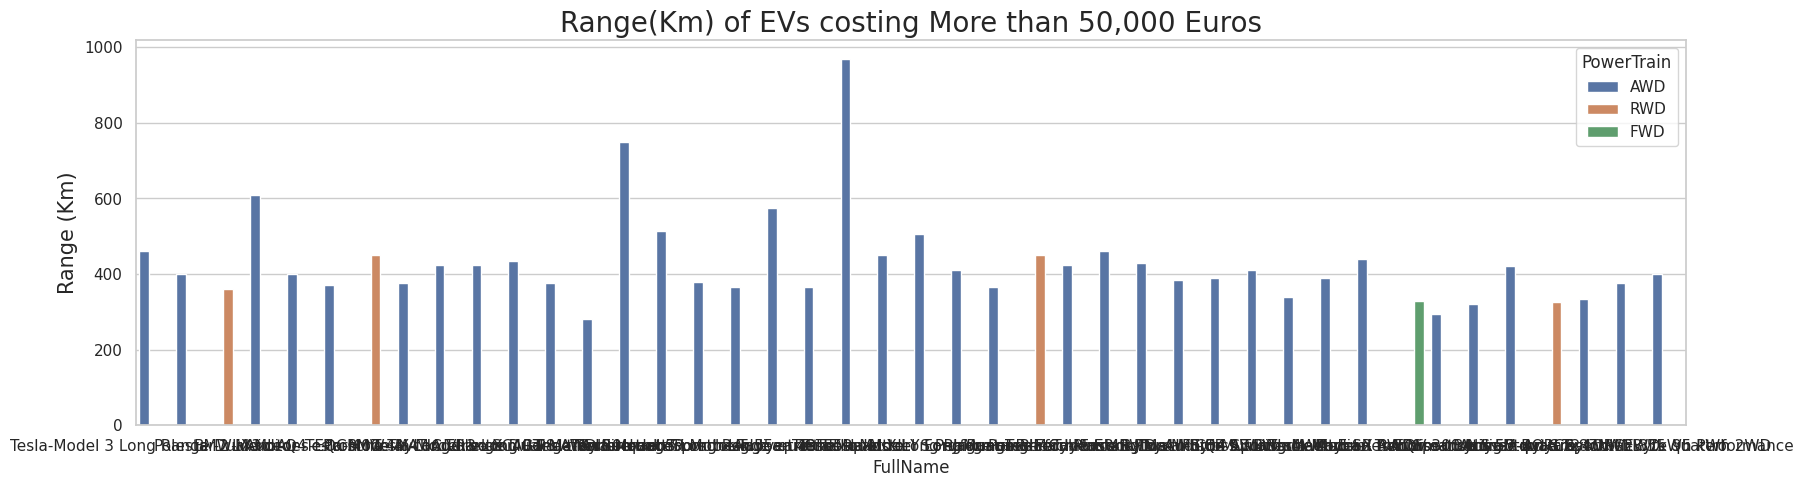

In [23]:
# Bar Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_1 and df_2 are your DataFrames, and t1 and t2 are valid variables or values
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")

# For df_1
sns.barplot(x='FullName', y='Range_Km', data=df_1, hue='PowerTrain')
plt.title('Range(Km) of EVs costing {}'.format(t1), fontsize=20)
plt.ylabel('Range (Km)', fontsize=15)

# For df_2
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='FullName', y='Range_Km', data=df_2, hue='PowerTrain')
plt.title('Range(Km) of EVs costing {}'.format(t2), fontsize=20)
plt.ylabel('Range (Km)', fontsize=15)

plt.show()

<ipython-input-14-9399ab31ece1>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


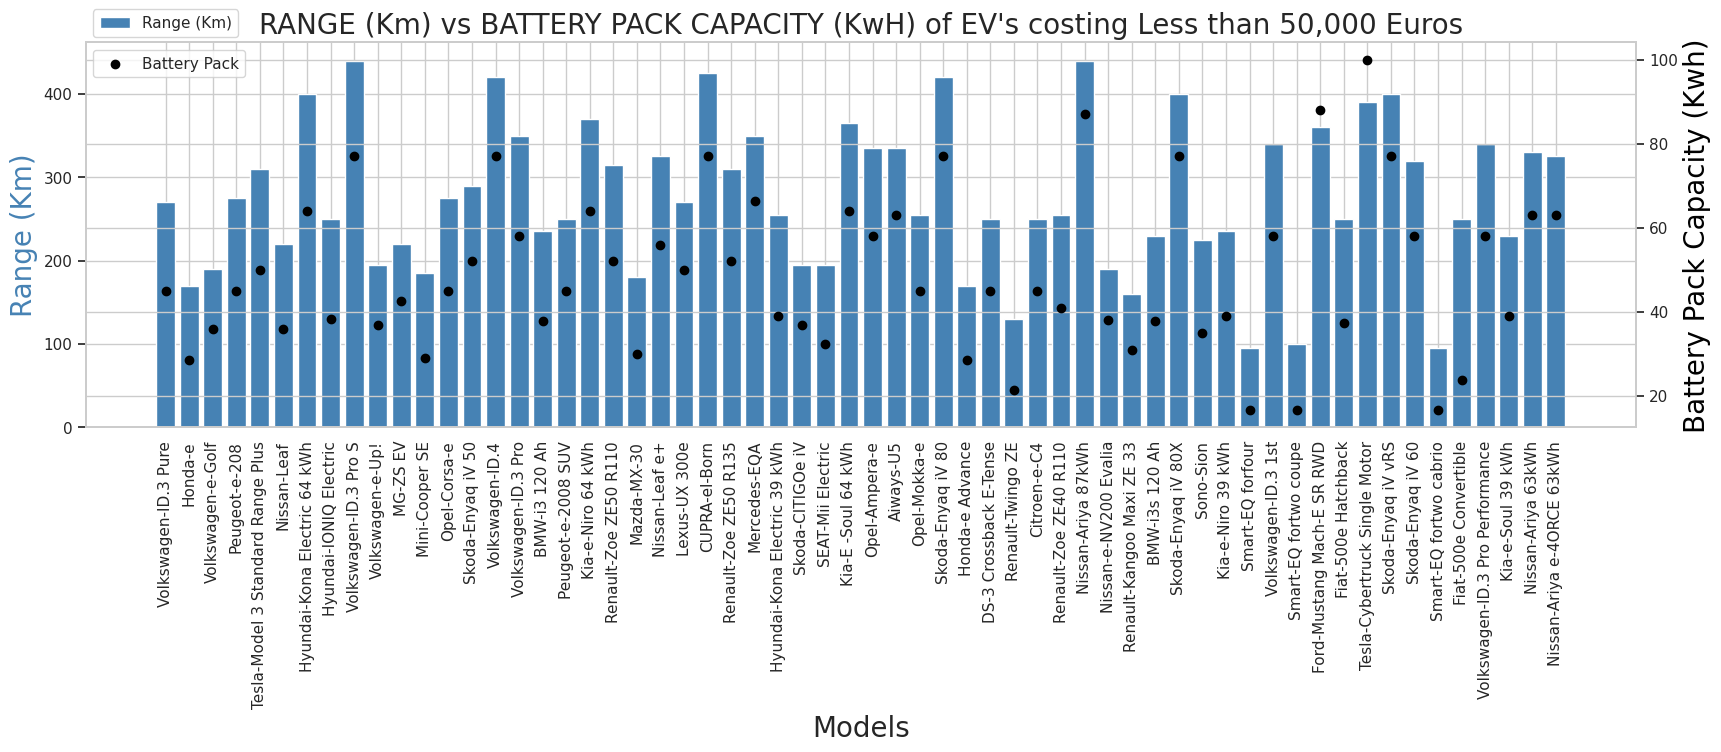

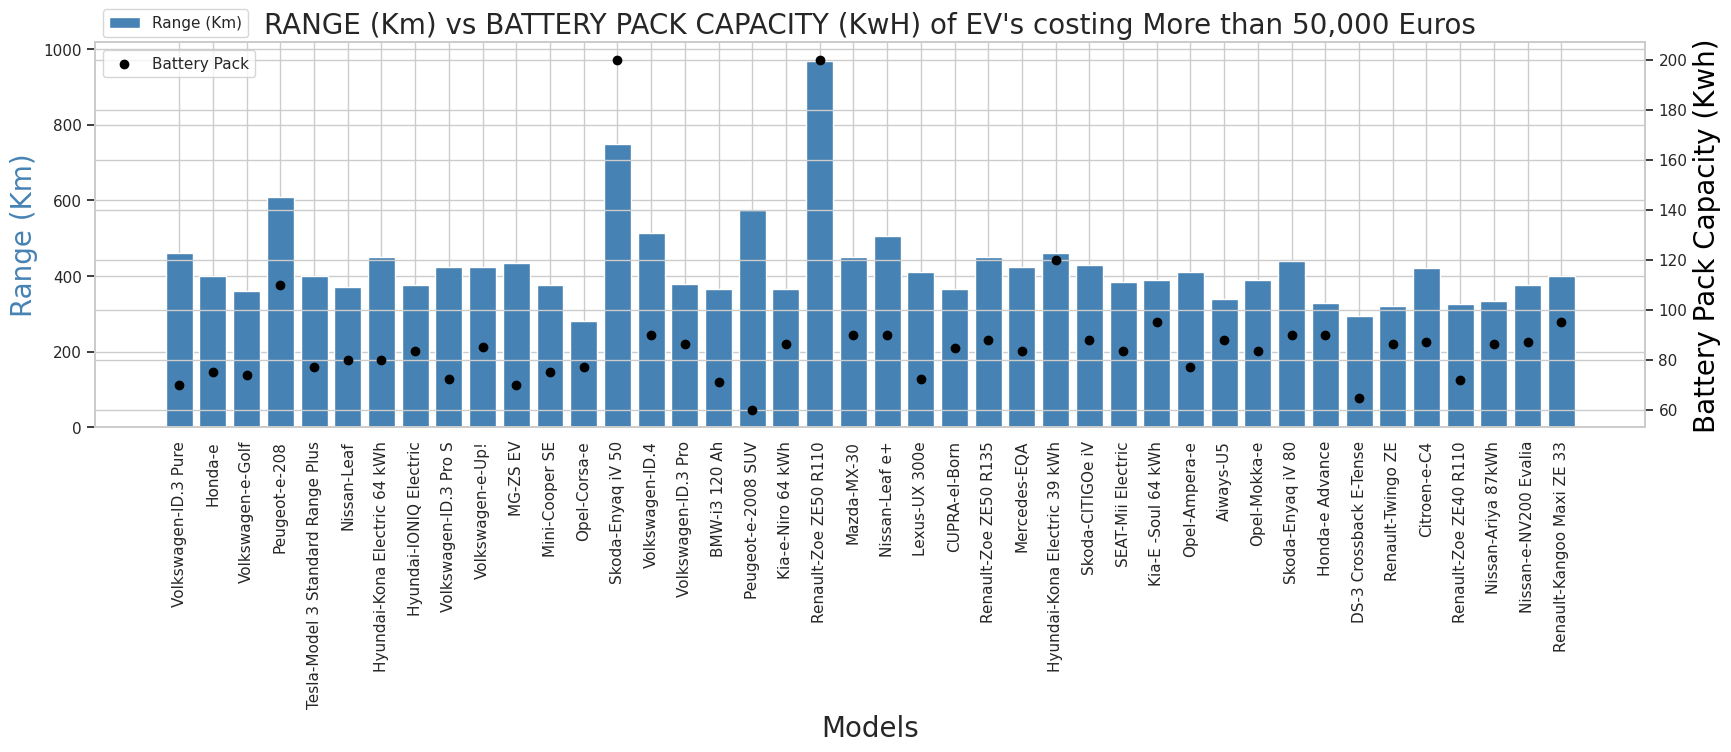

In [24]:
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

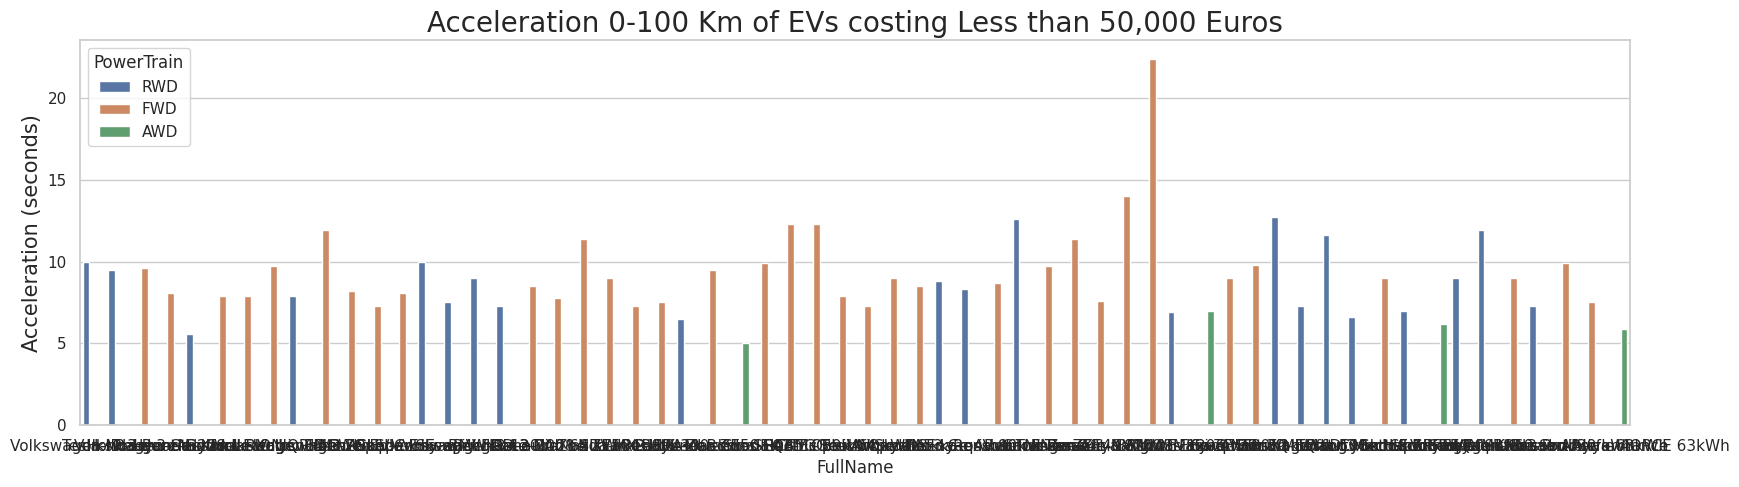

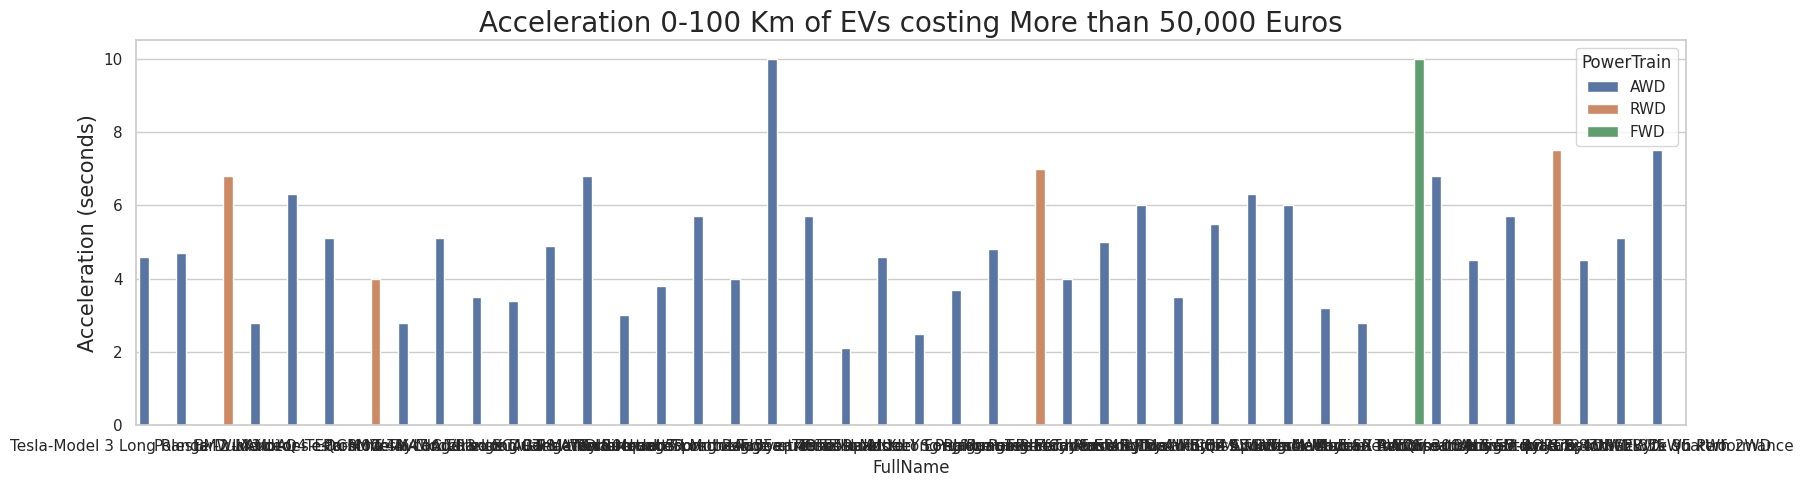

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def acc(dataframe, text):
    plt.figure(figsize=(20, 5))
    sns.set_theme(style="whitegrid")

    # Pass 'x' and 'y' as keyword arguments
    sns.barplot(x='FullName', y='AccelSec', data=dataframe, hue='PowerTrain')
    plt.title(f'Acceleration 0-100 Km of EVs costing {text}', fontsize=20)
    plt.ylabel('Acceleration (seconds)', fontsize=15)

# Assuming df_1 and df_2 are your DataFrames, and t1 and t2 are valid variables or values
acc(df_1, t1)
acc(df_2, t2)

plt.show()


<ipython-input-16-b4420112d778>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


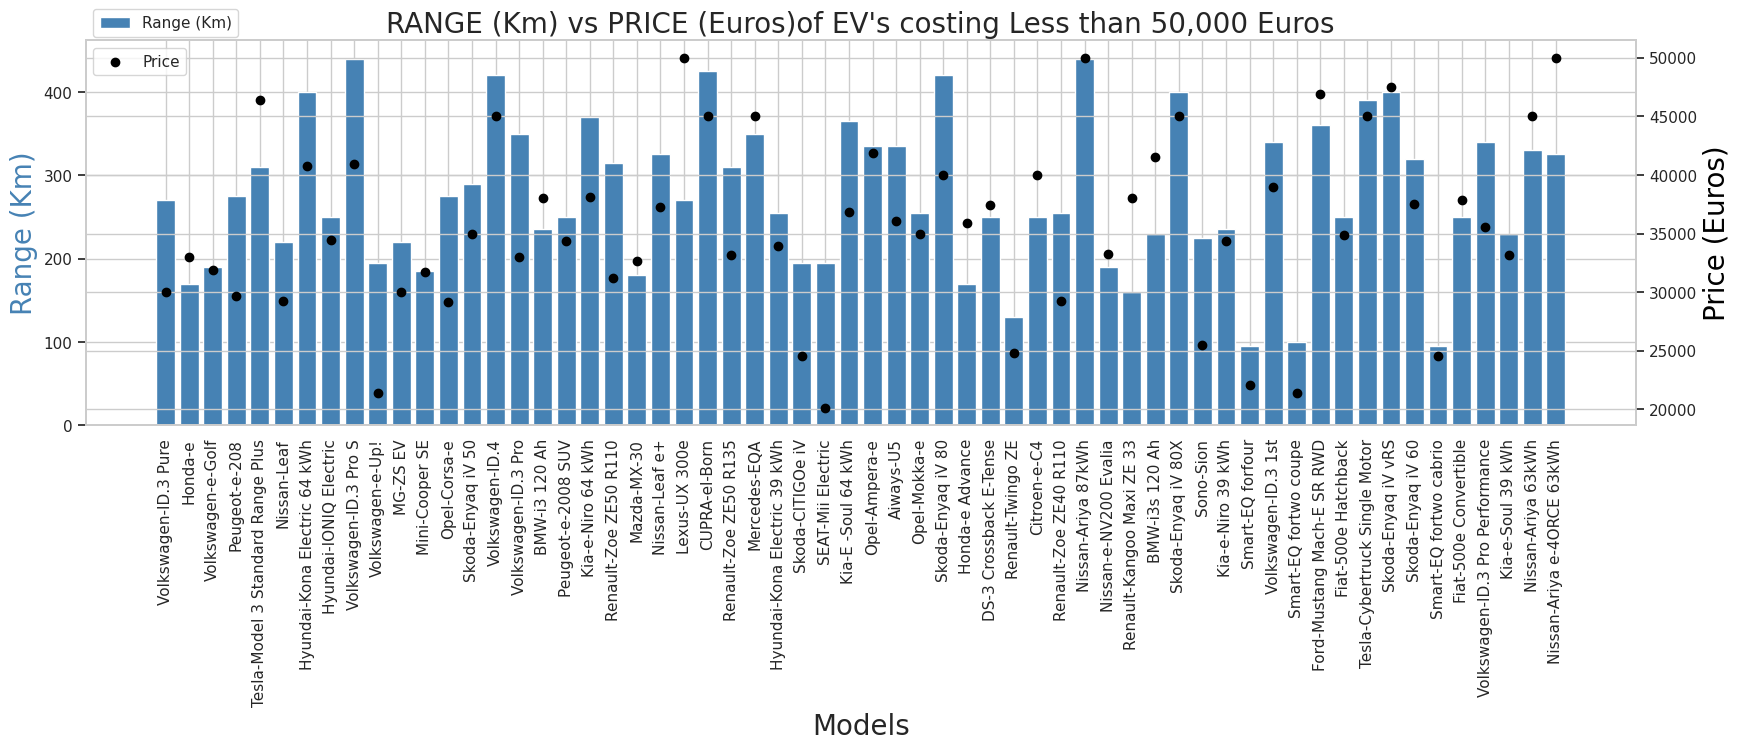

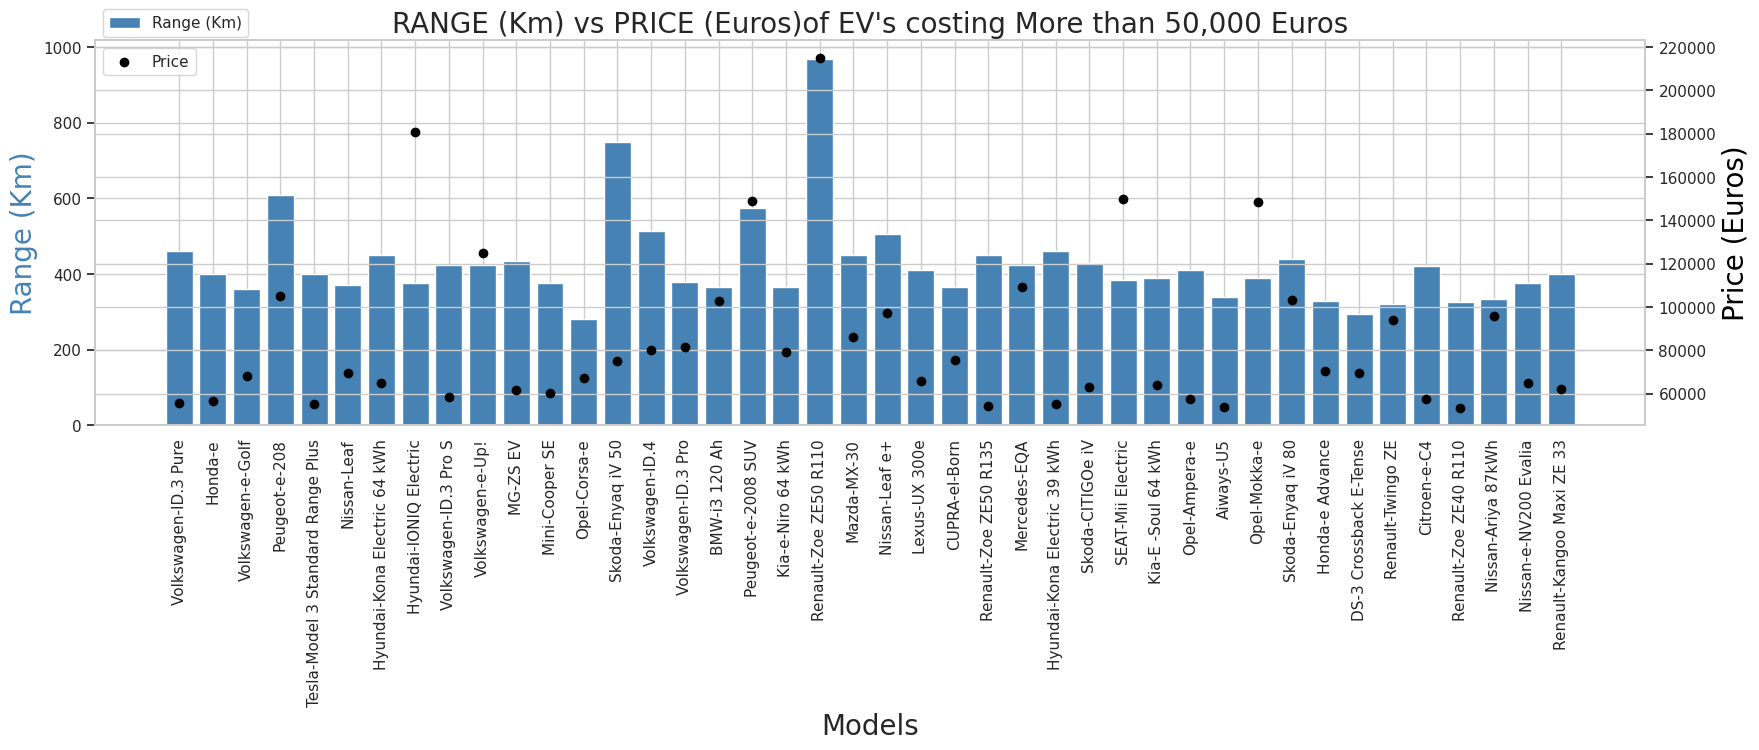

In [27]:
# price vs acceleration
range_price(df_1, t1)
range_price(df_2, t2)

<ipython-input-17-248bd1e2ddaa>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')


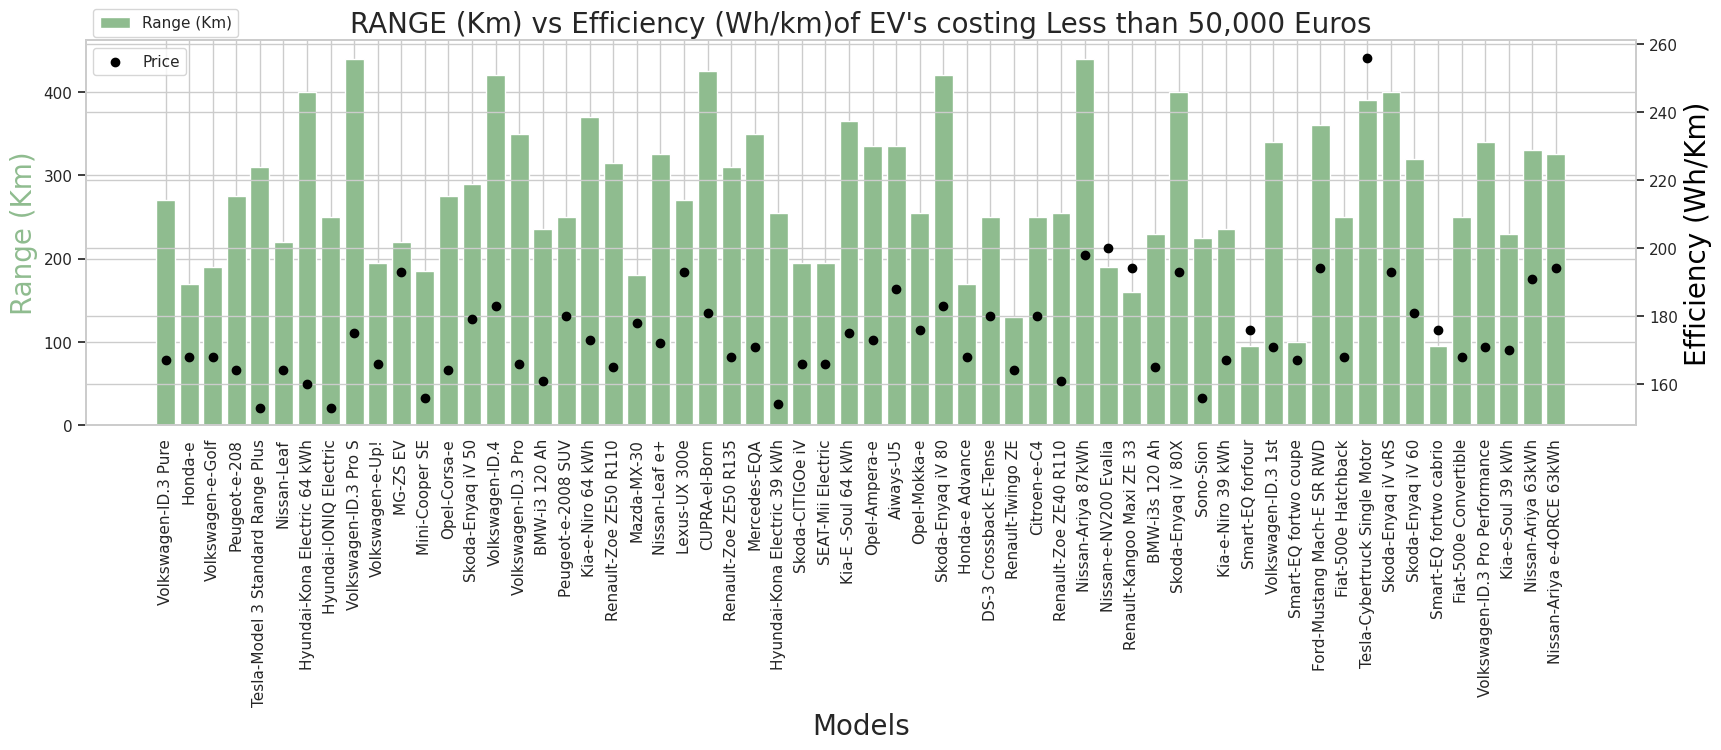

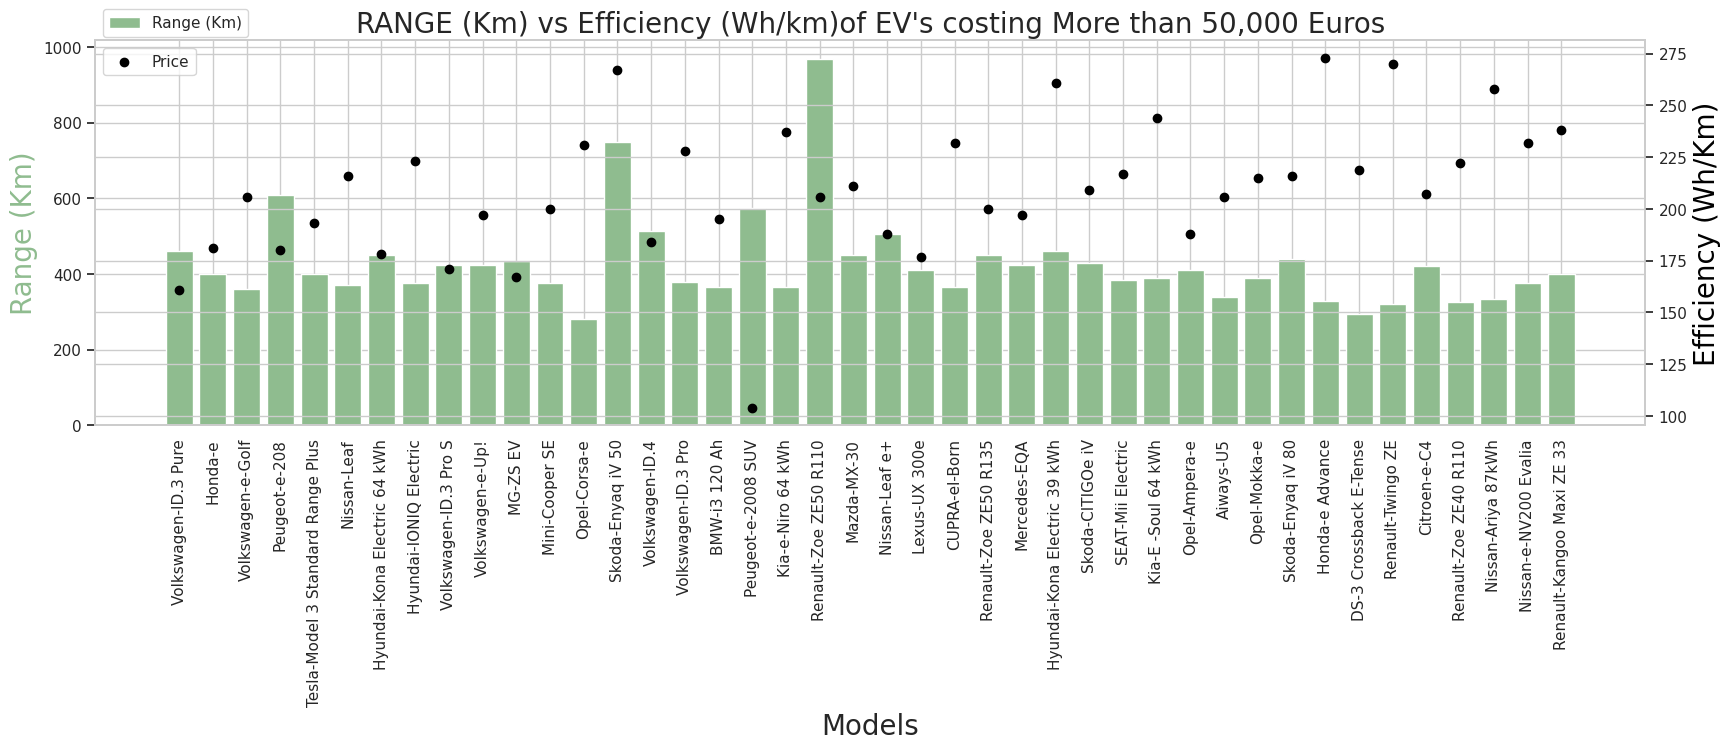

In [28]:
# range vs efficiency
range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

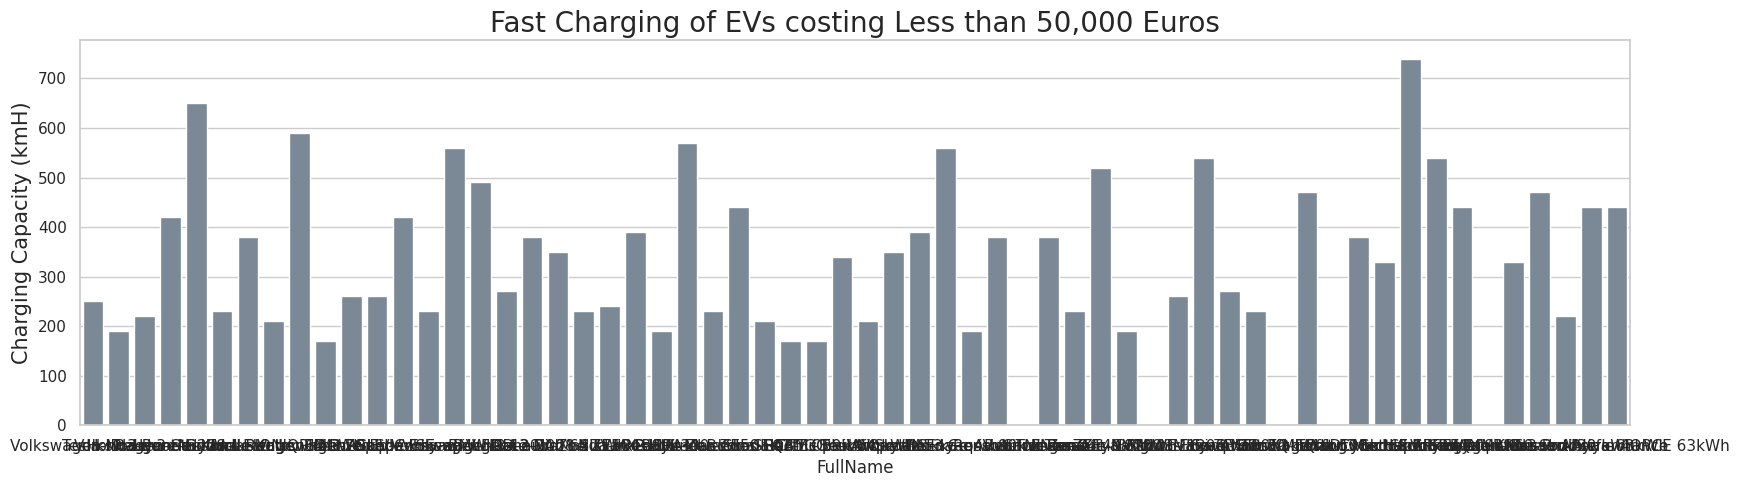

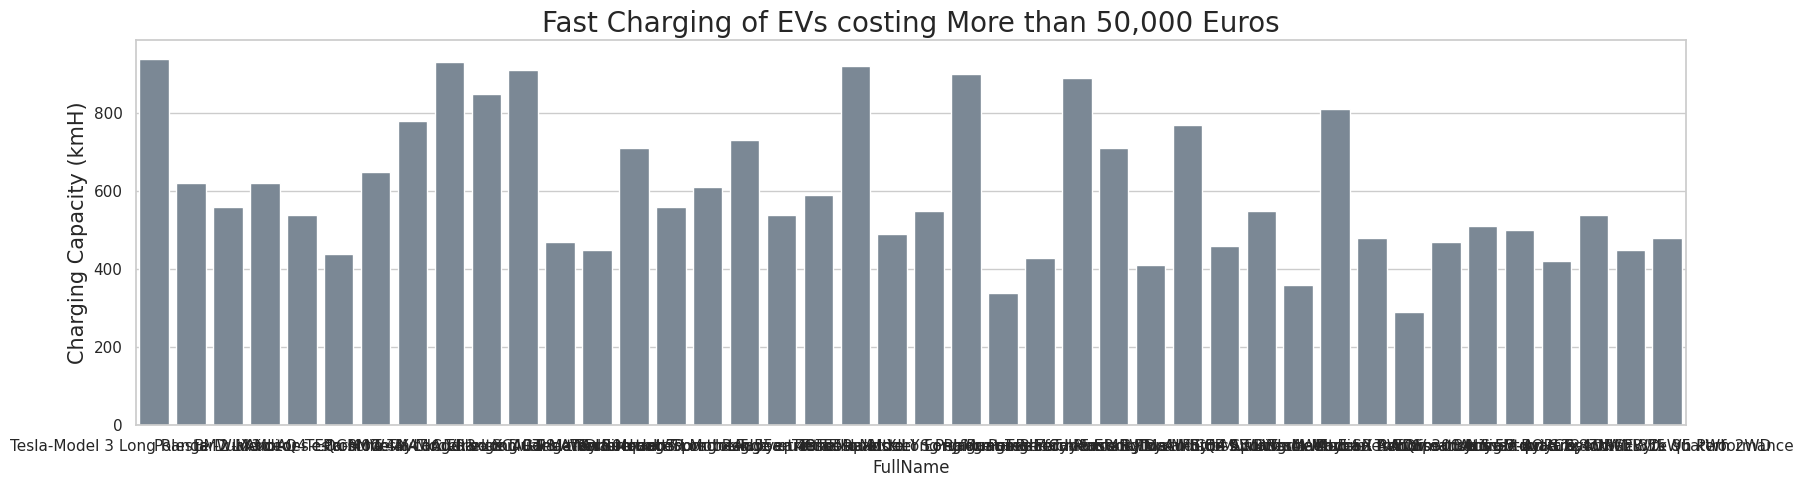

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def fastcharge(dataframe, price):
    plt.figure(figsize=(20, 5))
    sns.set_theme(style="whitegrid")

    # Pass 'x' and 'y' as keyword arguments
    sns.barplot(x='FullName', y='FastCharge_KmH', data=dataframe, color='lightslategrey')
    plt.title(f'Fast Charging of EVs costing {price}', fontsize=20)
    plt.ylabel('Charging Capacity (kmH)', fontsize=15)

# Assuming df_1 and df_2 are your DataFrames, and t1 and t2 are valid variables or values
fastcharge(df_1, t1)
fastcharge(df_2, t2)

plt.show()


**Answering some basic questions**

which vehicle has max range(km) under 50,000 Euros?


In [32]:
import pandas as pd

# Assuming you have your dataset loaded as "df_1" and you have already set the display options
top_range_1 = df_1.sort_values(by='Range_Km', ascending=False)
top_range_1_info = top_range_1[['FullName', 'Range_Km', 'Battery_Pack Kwh', 'PriceEuro', 'RapidCharge']]
print(top_range_1_info)


                             FullName  Range_Km  Battery_Pack Kwh  PriceEuro  \
62                 Nissan-Ariya 87kWh       440              87.0      50000   
15              Volkswagen-ID.3 Pro S       440              77.0      40936   
37                      CUPRA-el-Born       425              77.0      45000   
25                    Volkswagen-ID.4       420              77.0      45000   
53                  Skoda-Enyaq iV 80       420              77.0      40000   
12       Hyundai-Kona Electric 64 kWh       400              64.0      40795   
71                 Skoda-Enyaq iV 80X       400              77.0      45000   
88                 Skoda-Enyaq iV vRS       400              77.0      47500   
86      Tesla-Cybertruck Single Motor       390             100.0      45000   
31                  Kia-e-Niro 64 kWh       370              64.0      38105   
45                 Kia-E -Soul 64 kWh       365              64.0      36837   
83         Ford-Mustang Mach-E SR RWD   

**Which vehicle has max range(Km) costing more than 50,000 Euros**

In [33]:
pd.set_option('display.max_columns', None)
top_range_2 = df_2.sort_values(by= 'Range_Km', ascending= False)
print(top_range_2[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

                                   FullName  Range_Km  Battery_Pack Kwh  \
51                           Tesla-Roadster       970             200.0   
33               Tesla-Cybertruck Tri Motor       750             200.0   
5                                 Lucid-Air       610             110.0   
48                            Lightyear-One       575              60.0   
40                 Tesla-Model S Long Range       515              90.0   
59                Tesla-Model S Performance       505              90.0   
67              Tesla-Cybertruck Dual Motor       460             120.0   
0       Tesla-Model 3 Long Range Dual Motor       460              70.0   
54                 Tesla-Model X Long Range       450              90.0   
13                                   BMW-i4       450              80.0   
64               Ford-Mustang Mach-E ER RWD       450              88.0   
81                Tesla-Model X Performance       440              90.0   
24     Tesla-Model 3 Long

**Vehicles with best acceleration costing over 50,000 Euros**

In [34]:
pd.set_option('display.max_columns', None)
acceleration_2 = df_2.sort_values(by= 'AccelSec')
print(acceleration_2[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                                   FullName  AccelSec  Range_Km PowerTrain  \
51                           Tesla-Roadster       2.1       970        AWD   
59                Tesla-Model S Performance       2.5       505        AWD   
5                                 Lucid-Air       2.8       610        AWD   
81                Tesla-Model X Performance       2.8       440        AWD   
16                   Porsche-Taycan Turbo S       2.8       375        AWD   
33               Tesla-Cybertruck Tri Motor       3.0       750        AWD   
79                     Porsche-Taycan Turbo       3.2       390        AWD   
24     Tesla-Model 3 Long Range Performance       3.4       435        AWD   
23                           Audi-e-tron GT       3.5       425        AWD   
72             Porsche-Taycan Cross Turismo       3.5       385        AWD   
61     Tesla-Model Y Long Range Performance       3.7       410        AWD   
40                 Tesla-Model S Long Range       3.8       515 

**Number of vehicles produced by each brand**

In [35]:
companies = df.groupby('Brand').count()
print(companies['Model'].sort_values(ascending = False))

Brand
Tesla         13
Audi           9
Nissan         8
Volkswagen     8
Skoda          6
Porsche        5
Renault        5
Kia            4
BMW            4
Ford           4
Smart          3
Mercedes       3
Opel           3
Hyundai        3
Byton          3
Peugeot        2
Honda          2
Fiat           2
SEAT           1
Sono           1
Polestar       1
Aiways         1
MG             1
Mini           1
Mazda          1
Lucid          1
Lightyear      1
Lexus          1
Jaguar         1
DS             1
Citroen        1
CUPRA          1
Volvo          1
Name: Model, dtype: int64


Vehicles with maximum efficiency

In [36]:
pd.set_option('display.max_columns', None)
eff = df.sort_values(by= 'Efficiency_WhKm')
print(eff[['FullName','Efficiency_WhKm', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                              FullName  Efficiency_WhKm  Range_Km PowerTrain  \
48                       Lightyear-One              104       575        AWD   
14              Hyundai-IONIQ Electric              153       250        FWD   
8    Tesla-Model 3 Standard Range Plus              153       310        RWD   
41        Hyundai-Kona Electric 39 kWh              154       255        FWD   
74                           Sono-Sion              156       225        FWD   
..                                 ...              ...       ...        ...   
98  Audi-e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla-Cybertruck Dual Motor              261       460        AWD   
33          Tesla-Cybertruck Tri Motor              267       750        AWD   
90            Audi-e-tron S 55 quattro              270       320        AWD   
84               Mercedes-EQV 300 Long              273       330        FWD   

    Battery_Pack Kwh  PriceEuro  
48   

# **Conclusions**



*   Range of vehicle is proportional to Battery Pack Capacity
*   Price of vehicle is proportional battery pack capacity

*   EV's which cost less have higher acceleration(0-100 Km/Hr) time in order to maximize range
*   High performance EV's have lower efficiency

*   Most of the vehicles costing less than 50,000 Euros are Front Wheel Drive
*   Most of the vehicles costing over 50,000 Euros are either All wheel drive or Rear wheel drive and have better acceleration










